In [1]:
#https://github.com/marcyves/COVID19-Python/blob/master/COVID-19%20France%20Evolution.ipynb

In [2]:
import pandas as pd
# Read all data
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv").dropna()
print(df.head())

df

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  02/06/2020    2      6  2020    545       8             Afghanistan    AF   
1  01/06/2020    1      6  2020    680       8             Afghanistan    AF   
2  31/05/2020   31      5  2020    866       3             Afghanistan    AF   
3  30/05/2020   30      5  2020    623      11             Afghanistan    AF   
4  29/05/2020   29      5  2020    580       8             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia  


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,02/06/2020,2,6,2020,545,8,Afghanistan,AF,AFG,37172386.0,Asia
1,01/06/2020,1,6,2020,680,8,Afghanistan,AF,AFG,37172386.0,Asia
2,31/05/2020,31,5,2020,866,3,Afghanistan,AF,AFG,37172386.0,Asia
3,30/05/2020,30,5,2020,623,11,Afghanistan,AF,AFG,37172386.0,Asia
4,29/05/2020,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
20915,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
20916,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
20917,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
20918,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [3]:
# Get French data
df_fr = df[df.countriesAndTerritories == 'France']

# Retain only date, cases and deaths columns
df_fr = df_fr[['dateRep', 'cases', 'deaths']]

df_fr

,dateRep,cases,deaths
6895,02/06/2020,338,31
6896,01/06/2020,257,31
6897,31/05/2020,1828,57
6898,30/05/2020,597,52
6899,29/05/2020,3325,66
...,...,...,...
7045,04/01/2020,0,0
7046,03/01/2020,0,0
7047,02/01/2020,0,0
7048,01/01/2020,0,0


In [4]:
# Calculate cumulative cases & deaths
df_fr = df_fr.sort_values('dateRep')
df_fr['cumCases'] = df_fr.cases.cumsum()
df_fr['cumDeaths'] = df_fr.deaths.cumsum()

df_fr

,dateRep,cases,deaths,cumCases,cumDeaths
7048,01/01/2020,0,0,0,0
7017,01/02/2020,0,0,0,0
6988,01/03/2020,43,0,43,0
6957,01/04/2020,7578,499,7621,499
6927,01/05/2020,1139,289,8760,788
...,...,...,...,...,...
6898,30/05/2020,597,52,145886,28358
7018,31/01/2020,1,0,145887,28358
6958,31/03/2020,4376,418,150263,28776
6897,31/05/2020,1828,57,152091,28833


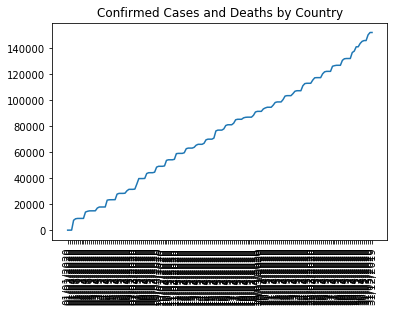

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title('Confirmed Cases and Deaths by Country')
plt.xticks(rotation=90)
plt.plot(df_fr.dateRep,df_fr.cumCases)


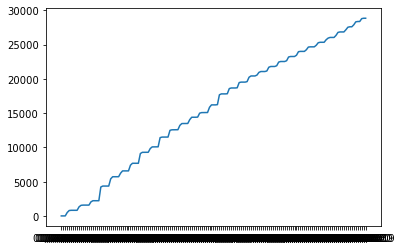

In [6]:
plt.plot(df_fr.dateRep, df_fr.cumDeaths)

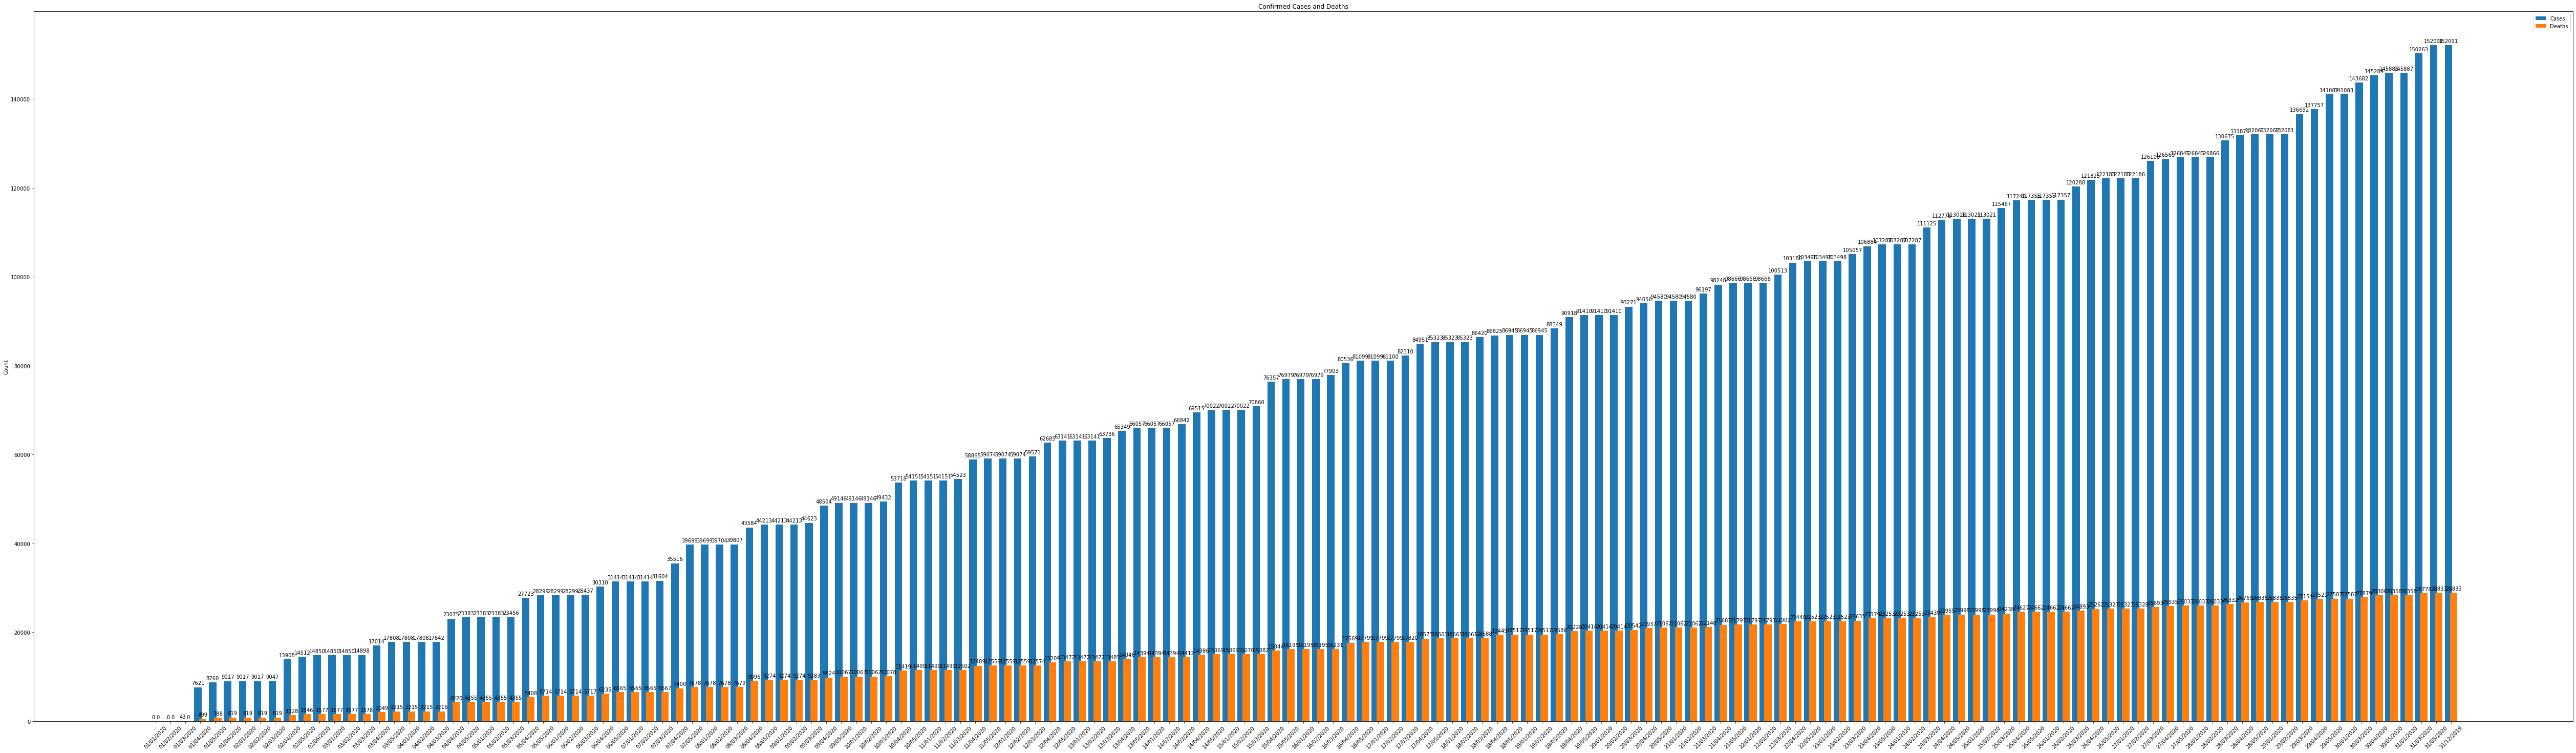

In [7]:
import numpy as np

x = np.arange(len(df_fr.dateRep))  # the label are dates
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(70,20))
rects1 = ax.bar(x - width/3, df_fr.cumCases, width, label='Cases')
rects2 = ax.bar(x + width/3, df_fr.cumDeaths, width, label='Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Confirmed Cases and Deaths')
ax.set_xticks(x)
ax.set_xticklabels(df_fr.dateRep)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.xticks(rotation=45)

plt.show()